In [1]:
import torch
import torch.nn as nn
from d2l import torch as d2l

In [2]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [3]:
conv_arch = ((1, 54), (1, 128), (2, 256), (2, 512), (2, 512))

In [4]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    return nn.Sequential(*conv_blks,
                         nn.Flatten(),
                         nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
                         nn.Linear(4096, 10)
                         )

In [5]:
net = vgg(conv_arch)

In [6]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t', X.shape)

Sequential output shape: 	 torch.Size([1, 54, 112, 112])
Sequential output shape: 	 torch.Size([1, 128, 56, 56])
Sequential output shape: 	 torch.Size([1, 256, 28, 28])
Sequential output shape: 	 torch.Size([1, 512, 14, 14])
Sequential output shape: 	 torch.Size([1, 512, 7, 7])
Flatten output shape: 	 torch.Size([1, 25088])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 10])


In [6]:
net.state_dict()

OrderedDict([('0.0.weight',
              tensor([[[[ 0.0260,  0.3289,  0.3061],
                        [ 0.2484, -0.1534, -0.0328],
                        [ 0.1728, -0.2689,  0.1764]]],
              
              
                      [[[-0.0360, -0.3116, -0.0595],
                        [-0.0191, -0.0076, -0.0899],
                        [ 0.2642, -0.0566,  0.2084]]],
              
              
                      [[[ 0.0102,  0.2483,  0.2391],
                        [ 0.1236,  0.2269, -0.0091],
                        [ 0.2788, -0.2768,  0.2812]]],
              
              
                      [[[ 0.0691,  0.0325, -0.3103],
                        [-0.0364,  0.1908,  0.2958],
                        [ 0.3051, -0.0364,  0.1747]]],
              
              
                      [[[-0.2535,  0.0302,  0.1524],
                        [-0.1963, -0.2899, -0.1418],
                        [-0.2858,  0.1523, -0.2205]]],
              
              
                 

In [7]:
batch_size = 64
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.110, train acc 0.958, test acc 0.922
181.3 examples/sec on cuda:0


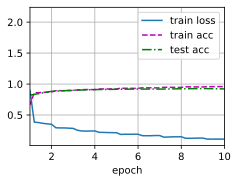

In [8]:
lr, num_epochs = 0.05, 10
d2l.train_ch6(net, train_iter,test_iter, num_epochs, lr, d2l.try_gpu())